In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Notebook Diagnóstico de fallas ventilador KKK:
- En el siguiente JN se entrenará un arbol de desición para la detección de: desbalanceamiento, desalineamiento o solturas en KKK.
- Los parámetros de entrada son los 5 primeros armónicos lectura sensores, ver df.
- El sentido lógico se evalua según la información entregada en MT.

In [2]:
#df=pd.read_excel('arbol_des.xlsx')
df=pd.read_excel('arbol.xlsx')

In [3]:
df

,4H_1X,4H_2X,4H_3X,4H_4X,4H_5X,3V_1X,3V_2X,3V_3X,3V_4X,3V_5X,3A_1X,3A_2X,3A_3X,3A_4X,3A_5X,Estado
0,1.9090,0.1898,0.03200,0.34000,0.05000,0.8530,0.5000,0.22000,0.12000,0.02000,1.7300,0.45000,0.11500,0.12700,0.02050,0
1,3.7240,0.1250,0.07700,0.25000,0.16500,1.9000,0.9800,0.30000,0.07000,0.08000,1.4870,0.47800,0.10600,0.07860,0.12320,0
2,2.2620,0.3230,0.07813,0.20940,0.09125,2.1450,0.6190,0.22290,0.02060,0.02731,0.8329,0.39820,0.03212,0.03037,0.10140,0
3,1.3670,0.2567,0.08332,0.11100,0.09186,5.5000,1052.0000,0.42800,0.06752,0.06250,2.8960,0.81100,0.22480,0.04200,0.08103,0
4,1.6580,0.1440,0.03000,0.22000,0.02900,1257.0000,0.5920,0.04500,0.07200,0.05400,1.2720,0.39410,0.09000,0.01100,0.08600,0
5,2.9950,0.3000,0.04900,0.13770,0.05986,0.8221,0.8104,0.12880,0.22150,0.04000,1.1640,0.76640,0.02270,0.04900,0.01300,0
6,2.5660,0.0494,0.04837,0.26180,0.10780,0.8340,0.3778,0.15730,0.04402,0.04898,0.7008,0.40540,0.11380,0.08030,0.03550,0
7,2.0080,0.6320,0.15690,0.13250,0.07400,4.6750,3.2650,0.30060,0.17320,0.12130,2.7840,1.06300,0.64000,0.15300,0.89110,0
8,0.3820,0.0715,0.01167,0.03480,0.01453,2.0980,1.4120,0.13520,0.17530,0.10740,0.9989,0.08736,0.23420,0.26780,0.02388,0
9,2.8520,0.2995,0.04900,0.10880,0.04660,0.8140,0.4460,0.13620,0.03570,0.05745,0.4255,0.64100,0.45000,0.14820,0.22420,0


In [4]:
# Matriz de datos x, matriz labels y

y = df['Estado']
X = df.drop('Estado',axis=1)

In [5]:
# División train test, mezcla de datos con 20% datos test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [6]:
# Busqueda de malla con validación cruzada

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1,2,3,4,5,6],
    'min_samples_split': [1,2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
}

tree = DecisionTreeClassifier(random_state=24)

# Utilizando CV=5
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [7]:
#rstate = 15,24
mydict = {'params':grid_search.cv_results_['params'], 'rank_test_score':grid_search.cv_results_['rank_test_score'], 'mean_test_score':grid_search.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)

display(mydata[mydata.rank_test_score == 1])

,params,rank_test_score,mean_test_score
176,"{'criterion': 'entropy', 'max_depth': None, 'm...",1,0.67
177,"{'criterion': 'entropy', 'max_depth': None, 'm...",1,0.67
178,"{'criterion': 'entropy', 'max_depth': None, 'm...",1,0.67
251,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1,0.67
252,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1,0.67
253,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",1,0.67
276,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1,0.67
277,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1,0.67
278,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1,0.67
301,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",1,0.67


In [8]:
# Algunos de los mejores modelos

print(mydata.iloc[253]['params'])
print(mydata.iloc[276]['params'])
print(mydata.iloc[277]['params'])
print(mydata.iloc[278]['params'])
print(mydata.iloc[303]['params'])
print(mydata.iloc[328]['params'])

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [9]:
# MODELO SELECCIONADO

tree = DecisionTreeClassifier(random_state=24, criterion='entropy', max_depth = 4, min_samples_leaf = 1, min_samples_split= 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       random_state=24)

In [10]:
# Evaluación train

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

train_predictions = tree.predict(X_train)

# Métricas
train_accuracy = accuracy_score(y_train, train_predictions)
print("Precisión train:", train_accuracy)

train_report = classification_report(y_train, train_predictions)
print("Métricas train:")
print(train_report)


Precisión train: 1.0
Métricas train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [11]:
# Evaluación test

test_predictions = tree.predict(X_test)

# Métricas
test_accuracy = accuracy_score(y_test, test_predictions)
print("Precisión test:", test_accuracy)

test_report = classification_report(y_test, test_predictions)
print("Métricas test:")
print(test_report)

Precisión test: 1.0
Métricas test:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



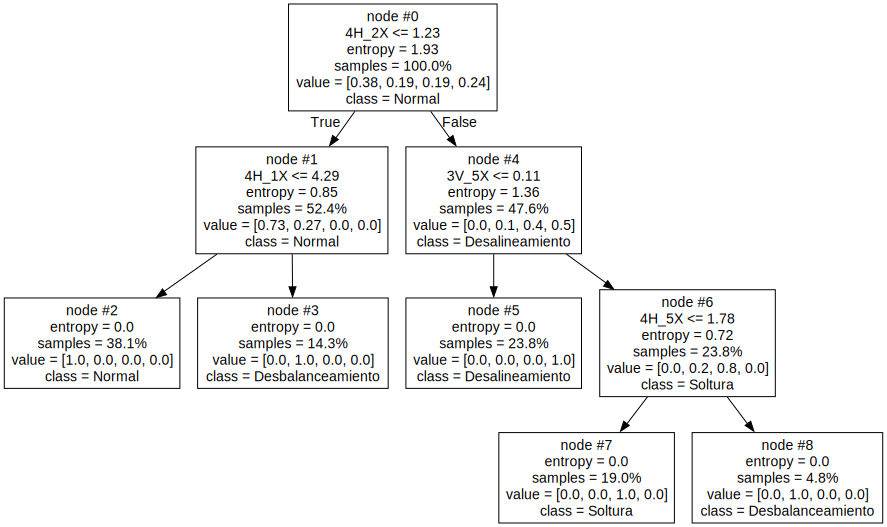

In [12]:
# Plot Decision Tree

from sklearn.tree import export_graphviz
import graphviz

# Mapeo clases
class_mapping = {
    0: 'Normal',
    1: 'Desbalanceamiento',
    2: 'Soltura',
    3: 'Desalineamiento'
}

# Árbol en formato dot
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns,class_names=[class_mapping[c] for c in tree.classes_],
                           impurity=True, node_ids=True, proportion=True, precision=2)

graph = graphviz.Source(dot_data)
#graph.render("arbol_decision", format='png')
graph.render("arbol_decision", format='svg')
graph

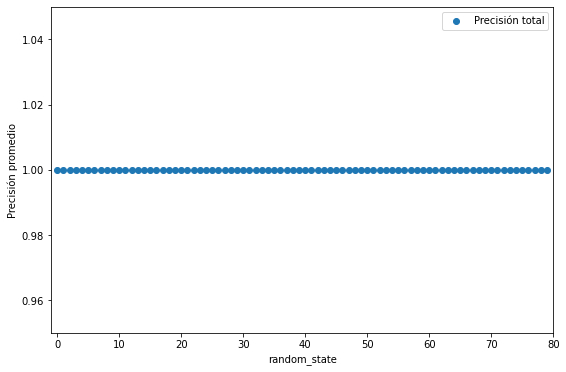

In [13]:
# Evaluación influencia random_state
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

random_states = np.arange(80)  
precisions = []

for random_state in random_states:
    tree = DecisionTreeClassifier(random_state=random_state, criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=3)
    tree.fit(X_train, y_train)
    train_pred = tree.predict(X_train)
    train_precision = accuracy_score(y_train, train_pred)

    test_pred = tree.predict(X_test)
    test_precision = accuracy_score(y_test, test_pred)

    avg_precision = (train_precision + test_precision) / 2
    precisions.append(avg_precision)

plt.figure(figsize=(9, 6))
plt.scatter(random_states, precisions, label = 'Precisión total')
plt.xlabel('random_state')
plt.ylabel('Precisión promedio')
plt.legend()


plt.xlim(-1,80)
plt.ylim(0.95,1.05)
plt.show()

In [14]:
#Modelo 2